In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(2,2) #one qubit represents the photon qubit, the other qubit represents the Bomb qubit

In [3]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [4]:
circuit.h(0)  #Hadamard gate on the photon qubit to represent a beam splitter (Hadamard gate turns the qubit into a superposition of 0 and 1)

In [5]:
circuit.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────
          
c: 2/═════

In [6]:
circuit.cnot(0,1) #the cnot is the Bomb

In [7]:
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [8]:
circuit.h(0) # second beam splitter
circuit.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘     
c: 2/═══════════════

In [9]:
# now we measure everything
circuit.measure_all()
circuit.draw()

┌───┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├──────░──╫─┤M├
             └───┘      ░  ║ └╥┘
   c: 2/═══════════════════╬══╬═
                           ║  ║ 
meas: 2/═══════════════════╩══╩═
                           0  1

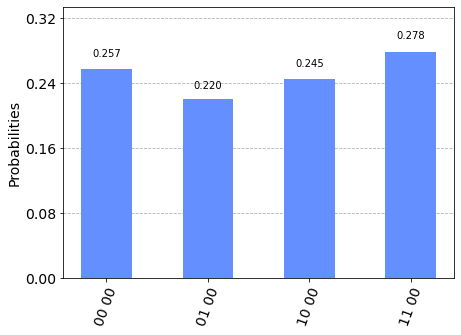

In [10]:
# running the ckt
from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(circuit, shots = 1000)
result = job.result()
counts = result.get_counts(circuit)

from qiskit.visualization import plot_histogram
plot_histogram(counts)